# EDA on Retail data , Drawing valid Insights for future Growth!

# GRIPAUG21 , RISHAV JHA :-

In [2]:
import pandas as pd
path = r"C:\Users\rishav jha\Downloads\SampleSuperstore.csv"
import os
os.path.exists(path)

True

In [3]:
df = pd.read_csv(path)
df.head(4)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310


In [4]:
df.shape

(9994, 13)

In [5]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
import numpy as np
df.replace("?" , np.nan , inplace = True)

In [7]:
null_df = df.isnull()

In [8]:
for j in null_df.columns.values.tolist():
    print(j)
    print(null_df[j].value_counts())

Ship Mode
False    9994
Name: Ship Mode, dtype: int64
Segment
False    9994
Name: Segment, dtype: int64
Country
False    9994
Name: Country, dtype: int64
City
False    9994
Name: City, dtype: int64
State
False    9994
Name: State, dtype: int64
Postal Code
False    9994
Name: Postal Code, dtype: int64
Region
False    9994
Name: Region, dtype: int64
Category
False    9994
Name: Category, dtype: int64
Sub-Category
False    9994
Name: Sub-Category, dtype: int64
Sales
False    9994
Name: Sales, dtype: int64
Quantity
False    9994
Name: Quantity, dtype: int64
Discount
False    9994
Name: Discount, dtype: int64
Profit
False    9994
Name: Profit, dtype: int64


In [9]:
for j in df.columns.values.tolist():
    print(j)
    print(df[j].value_counts())

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
Country
United States    9994
Name: Country, dtype: int64
City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Whittier           1
Ormond Beach       1
Baytown            1
Vacaville          1
Conroe             1
Name: City, Length: 531, dtype: int64
State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182

In [10]:
df.corr()#pearson correlation is about linear relationship (be cautious!)

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:xlabel='Discount', ylabel='Sales'>

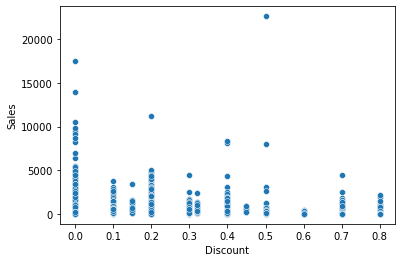

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = "Discount", y = "Sales" , data = df)# there is negligible correlation

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

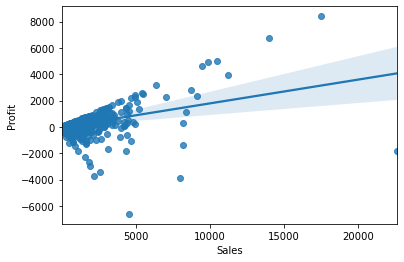

In [12]:
sns.regplot(x = "Sales", y = "Profit", data = df)#positive correlation but not very strong

In [13]:
from scipy import stats
pcoeff , pval = stats.pearsonr(df["Sales"] , df["Profit"] )
print("pcoeff is ",pcoeff , "and pvalue is ", pval)

pcoeff is  0.47906434973770606 and pvalue is  0.0


# pval < 0.001 imply there is strong correlation but non-linear!

In [14]:
pcoeff , pval = stats.pearsonr(df["Discount"], df["Sales"])
print("pearson coeff :",pcoeff , "pvalue :", pval)

pearson coeff : -0.02819012415753557 pvalue : 0.004826752925377619


# pval is close to 0.001 so a strong correlation but not linear !


<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

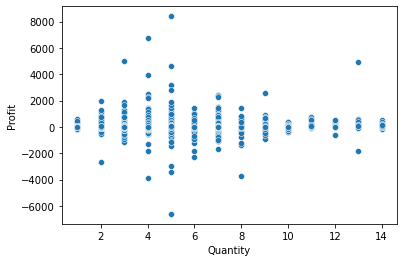

In [15]:
sns.scatterplot(x = "Quantity" , y = "Profit" , data = df)

In [16]:
pcoef , pval = stats.pearsonr(df["Quantity"] , df["Profit"])
print("pcoef is :",pcoef , "pvalue is :", pval)

pcoef is : 0.06625318912428485 pvalue is : 3.361709415923692e-11


# Quantity is a good predictor of profit ````

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

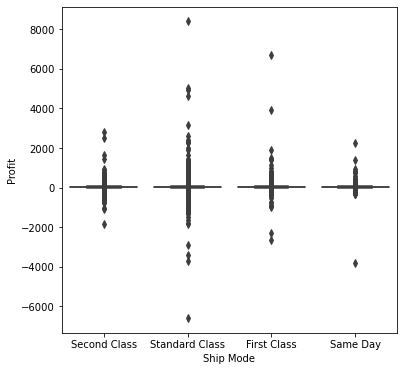

In [17]:
import matplotlib.pyplot as plt
plt.figure( figsize = (6,6) )
sns.boxplot(x = "Ship Mode", y = "Profit" , data = df)# ship mode do not affect profit

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

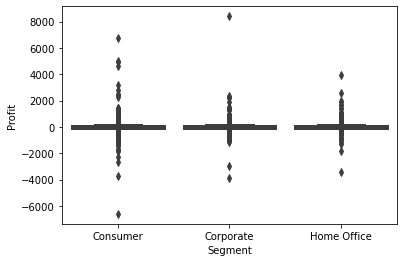

In [18]:
sns.boxplot(x = "Segment", y ="Profit" , data = df , linewidth = 5)

In [19]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [20]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

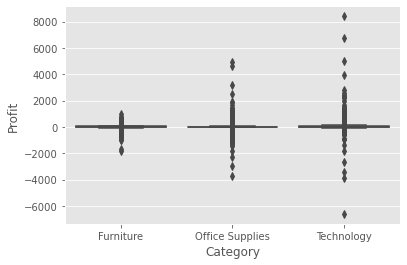

In [40]:
sns.boxplot(x = df["Category"], y = df["Profit"])

In [22]:
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

<AxesSubplot:xlabel='Region', ylabel='Profit'>

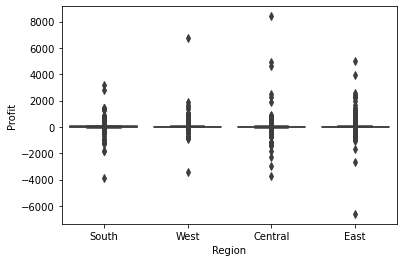

In [23]:
sns.boxplot(x = "Region", y ="Profit" , data = df)

# shipmode, category , Region do not have much impact on Profit

<AxesSubplot:xlabel='Region', ylabel='Profit'>

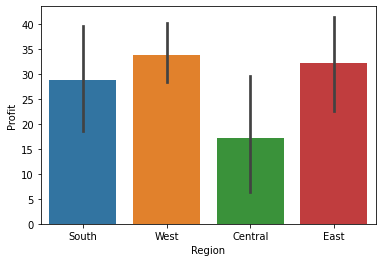

In [24]:
sns.barplot(x = "Region" , y = "Profit" , data = df )

<AxesSubplot:xlabel='Category', ylabel='Profit'>

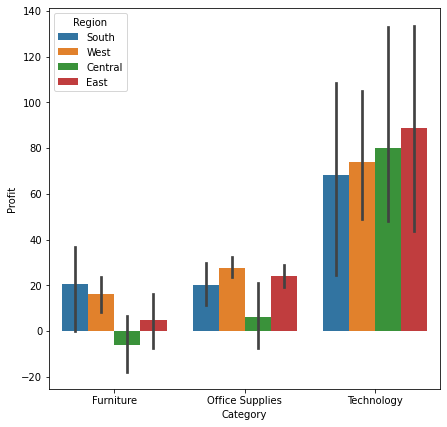

In [25]:
plt.figure(figsize = (7,7))
sns.barplot(x = "Category" , y ="Profit" , data = df , hue = "Region")

<AxesSubplot:xlabel='Profit', ylabel='Ship Mode'>

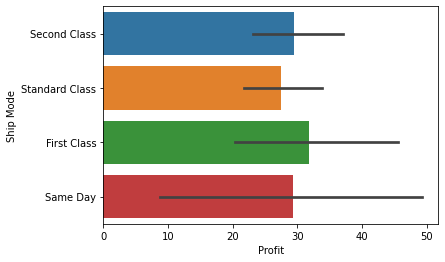

In [26]:
sns.barplot(x = "Profit" , y = "Ship Mode" , data = df)

<AxesSubplot:xlabel='Profit', ylabel='Segment'>

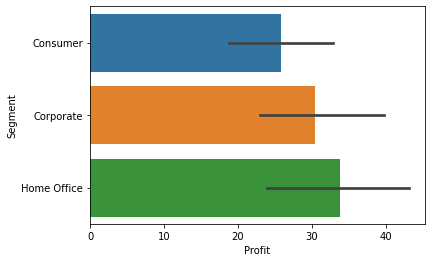

In [27]:
sns.barplot(x = "Profit" , y ="Segment" , data = df)

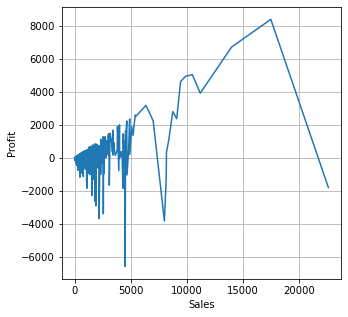

In [28]:
plt.figure(figsize = (5,5))
sns.lineplot(y = "Profit" , x ="Sales" , data = df)
from matplotlib import style
style.use("ggplot")
plt.grid("brown")
plt.show()

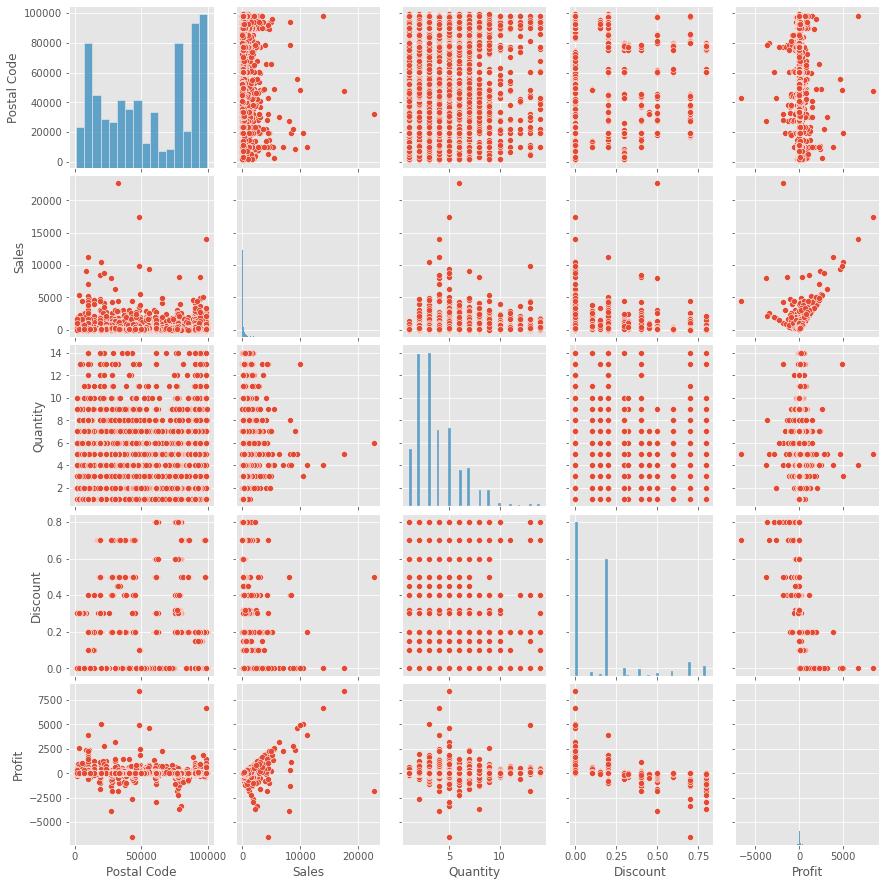

In [29]:
sns.pairplot(data = df)

C:\Users\rishav jha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

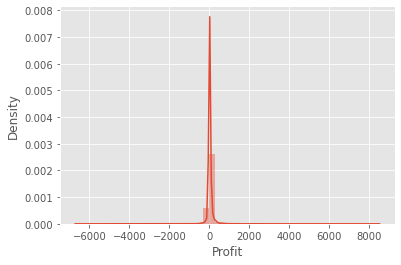

In [45]:
sns.distplot(df["Profit"])

C:\Users\rishav jha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

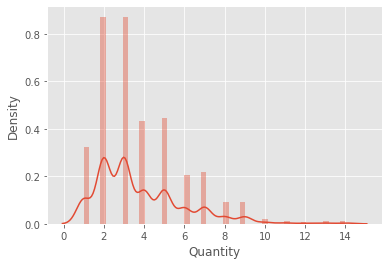

In [31]:
sns.distplot(df["Quantity"])

C:\Users\rishav jha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Discount', ylabel='Density'>

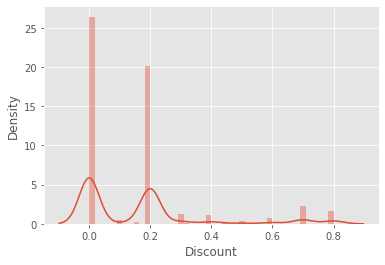

In [32]:
sns.distplot(df["Discount"])

C:\Users\rishav jha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

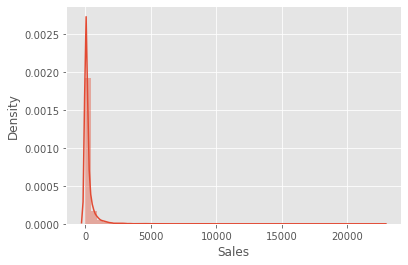

In [43]:
sns.distplot(df["Sales"])

<AxesSubplot:xlabel='Profit', ylabel='Count'>

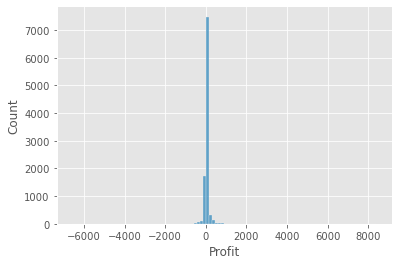

In [48]:
sns.histplot(df["Profit"] , bins = 100)

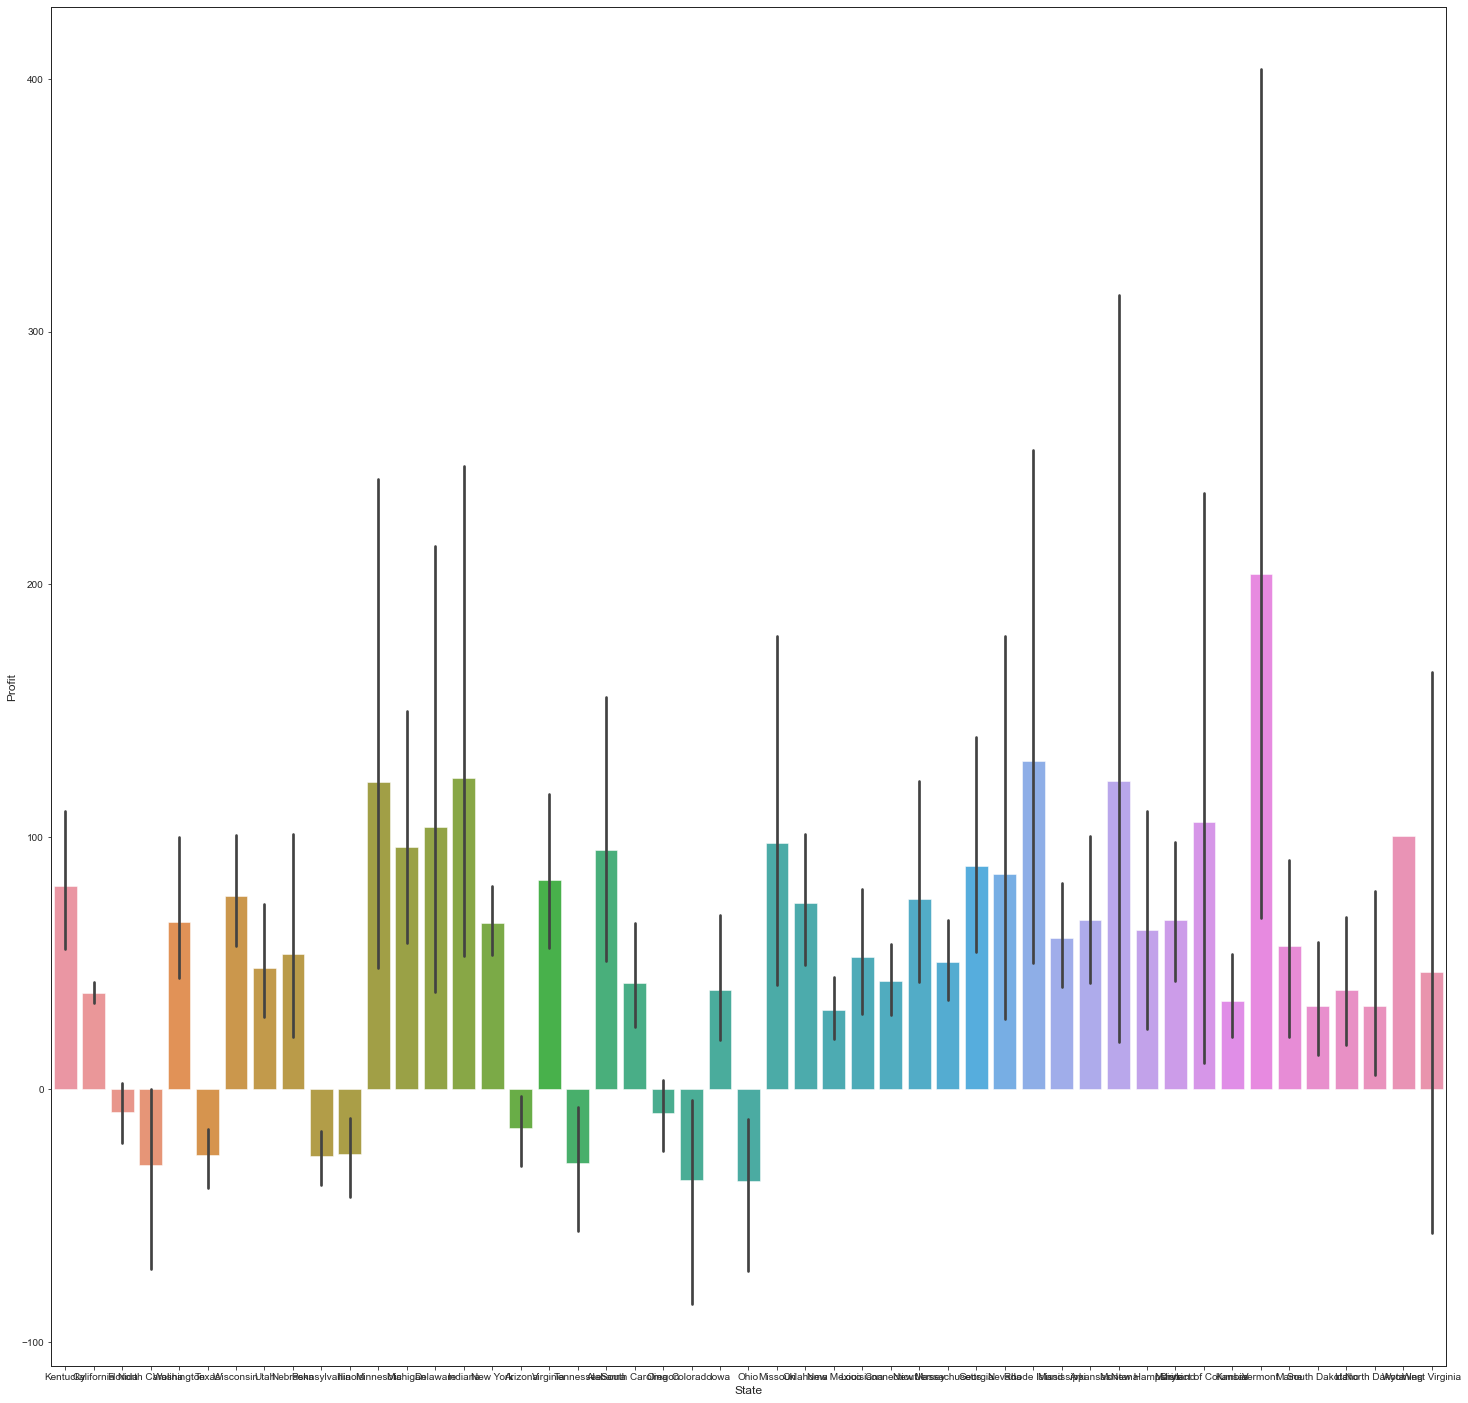

In [65]:
plt.figure(figsize = (25,25))
sns.barplot(x = df["State"] , y = df["Profit"])
sns.set_style("ticks")

<AxesSubplot:xlabel='Discount', ylabel='count'>

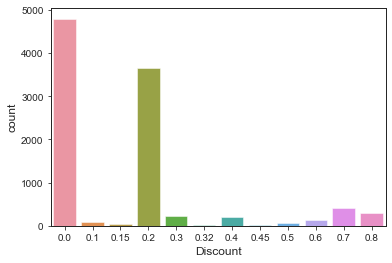

In [70]:
sns.countplot(x = df["Discount"])

<AxesSubplot:xlabel='Quantity', ylabel='count'>

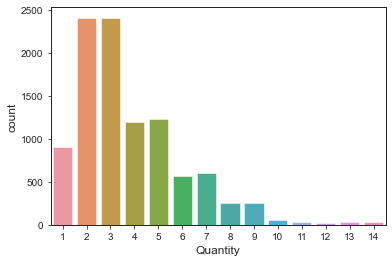

In [68]:
sns.countplot(x = df["Quantity"])